Keiana Dunn
Project 2
Voting records - party prediction
Neural Network for binary classification Predictive Modeling
Date: 4/24/19

# Import library

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Used to encode labels with value between 0 and 1. 
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(7)# split into input (X) and output (Y) variables using 16 inputs

/home/ktd2001/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load data

In [2]:
#read in file that consist of strings of text
dataset = pd.read_csv("votingrecords.csv", header = None)

# LabelEncoder used to assigning labels categorical, fit used to encode on to labels, and Transform label used to normalized encoding
dataset1 = dataset.apply(LabelEncoder().fit_transform) 

# Convert dataframe into a numpy array
dataset2 = dataset1.values

print(dataset2)

# Shows # of observations and variables 
print(dataset2.shape) 

[[0 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]]
(232, 17)


In [3]:
# split into input (X) and output (Y) variables
# democrat = 0, republican = 1                                         
X = dataset2[:,1:17]
Y = dataset2[:,0]

# Create model architecture

In [4]:
# Create sequential model 
model = Sequential()
# Create Multilayer Perceptron with binary classes and activation functions
model.add(Dense(12, input_dim=16,activation='relu')) #16 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

Instructions for updating:
Colocations handled automatically by placer.


# Compile network optimizer, loss function, and metrics to train the model

In [5]:
# Learning Rate 
adam_50 = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#Compile model using loss function, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model by training neural network

In [6]:
# Fit the model 
history = model.fit(X,Y,epochs=50,batch_size=10, verbose=0)

Instructions for updating:
Use tf.cast instead.


# Evaluate efficiency and performance of the model now that NN is built

In [7]:
# Evaluates the model efficiency and performance
scores_50 = model.evaluate(X, Y)   # Evaluation of the loss function for a given inputs
y_predict_50 = model.predict(X)    # Prediction results
print(scores_50)
print(y_predict_50)

232/232 [==============================] - 0s 277us/step
[0.18308889917258558, 0.9870689655172413]
[[2.48104334e-03]
 [7.15861917e-01]
 [6.15417957e-05]
 [1.07067823e-03]
 [3.22574377e-03]
 [8.44299793e-05]
 [6.15417957e-05]
 [7.15861917e-01]
 [6.15417957e-05]
 [7.15861917e-01]
 [3.74853611e-04]
 [7.15861917e-01]
 [1.07067823e-03]
 [7.15861917e-01]
 [7.15861917e-01]
 [7.15861917e-01]
 [3.87430191e-05]
 [4.08455729e-03]
 [1.28948689e-03]
 [2.60061026e-03]
 [5.61042428e-02]
 [6.15417957e-05]
 [7.15861917e-01]
 [7.15861917e-01]
 [7.15861917e-01]
 [7.15861917e-01]
 [7.15861917e-01]
 [7.15861917e-01]
 [1.72555447e-04]
 [7.15861917e-01]
 [7.15861917e-01]
 [7.15861917e-01]
 [1.07067823e-03]
 [5.99952340e-01]
 [7.15861917e-01]
 [5.47617674e-04]
 [4.80692565e-01]
 [1.07331187e-01]
 [1.06391311e-03]
 [7.15861917e-01]
 [7.15861917e-01]
 [7.15861917e-01]
 [2.56353617e-03]
 [7.15861917e-01]
 [7.15861917e-01]
 [1.55752897e-03]
 [3.22574377e-03]
 [2.10791826e-04]
 [6.03973866e-04]
 [8.93417001e-03]
 

# List all data in history and accuracy rate

In [8]:
print(history.history.keys())


dict_keys(['loss', 'acc'])


In [9]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_50[1]*100))


acc: 98.71%


In [10]:
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_50[0]*100))


loss: 18.31%


# Create confusion matrix details

In [11]:
# Create confusion matrix details
rounded_50 = [round(i[0]) for i in y_predict_50]
y_pred_50 = np.array(rounded_50,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred_50)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Confusion Matrix
True negatives:  121
False negatives:  0
False positives:  3
True positives:  108


# Plot accuracy and loss

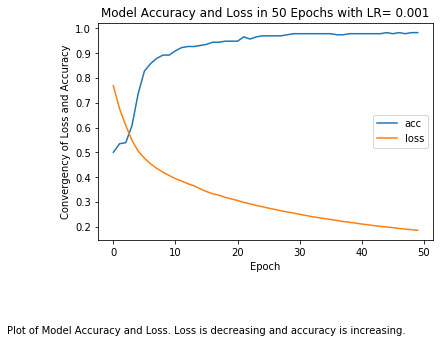

In [12]:
#Plot figure
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 50 Epochs with LR= 0.001')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
plt.text(15,-0.2, 'Plot of Model Accuracy and Loss. Loss is decreasing and accuracy is increasing.', ha='center', va='top')
plt.show()

In [14]:
# Create sequential model 
model = Sequential()
# Create Multilayer Perceptron with binary classes and activation functions
model.add(Dense(12, input_dim=16,activation='relu')) #16 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

# Learning Rate 
adam_100 = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#Compile model using loss function, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model 
history = model.fit(X,Y,epochs=100,batch_size=10, verbose=0)

# Evaluates the model efficiency and performance
scores_100 = model.evaluate(X, Y)   # Evaluation of the loss function for a given inputs
Y_predict_100 = model.predict(X)    # Prediction results
print(scores_100)
print(Y_predict_100)

# Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_100[1]*100))

# Loss rate
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_100[0]*100))

# Create confusion matrix details
rounded_100 = [round(i[0]) for i in Y_predict_100]
Y_predict_100 = np.array(rounded_100,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, Y_predict_100)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 816us/step
[0.02757145159331889, 0.9913793103448276]
[[2.43008137e-04]
 [9.99078035e-01]
 [1.75833702e-05]
 [1.00940466e-04]
 [2.69433856e-03]
 [6.20782375e-05]
 [1.75833702e-05]
 [9.99906540e-01]
 [1.75833702e-05]
 [9.97438192e-01]
 [7.44789839e-04]
 [9.99078035e-01]
 [1.00940466e-04]
 [9.97438192e-01]
 [9.99527037e-01]
 [9.99898016e-01]
 [2.61962414e-05]
 [1.23083591e-03]
 [3.37183475e-04]
 [5.38796186e-04]
 [1.58566236e-02]
 [1.75833702e-05]
 [9.99972224e-01]
 [9.76290226e-01]
 [9.91349339e-01]
 [9.99959826e-01]
 [9.99959826e-01]
 [9.97438192e-01]
 [6.69360161e-05]
 [9.99870598e-01]
 [8.89266491e-01]
 [9.99898016e-01]
 [1.00940466e-04]
 [6.08897209e-01]
 [9.99885559e-01]
 [2.05934048e-05]
 [2.53093660e-01]
 [5.98022044e-02]
 [1.16378069e-04]
 [9.99976575e-01]
 [9.99943852e-01]
 [9.97484922e-01]
 [2.62767076e-04]
 [9.99857426e-01]
 [9.97484922e-01]
 [9.03010368e-06]
 [2.69433856e-03]
 [5.09023666e-05]
 [5.68330288e-05]
 [3.62923741e-03]
 

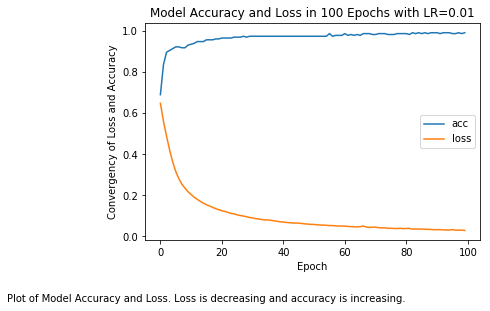

In [15]:
#Plot figure
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 100 Epochs with LR=0.01')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
plt.text(15, -0.28, 'Plot of Model Accuracy and Loss. Loss is decreasing and accuracy is increasing.', ha='center', va='top')
plt.show()

In [24]:
# Create sequential model 
model = Sequential()
# Create Multilayer Perceptron with binary classes and activation functions
model.add(Dense(12, input_dim=16,activation='relu')) #16 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

# Learning Rate 
adam_300 = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#Compile model using loss function, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model 
history = model.fit(X,Y,epochs=300,batch_size=10, verbose=0)

# Evaluates the model efficiency and performance
scores_300 = model.evaluate(X, Y) # Evaluation of the loss function for a given inputs
y_predict_300 = model.predict(X)  # Prediction results

# Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_300[1]*100))

# Loss rate
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_300[0]*100))

# Create confusion matrix details
rounded_300 = [round(i[0]) for i in y_predict_300]
y_pred_300 = np.array(rounded_300,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred_300)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 1ms/step

acc: 100.00%

loss: 0.07%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108


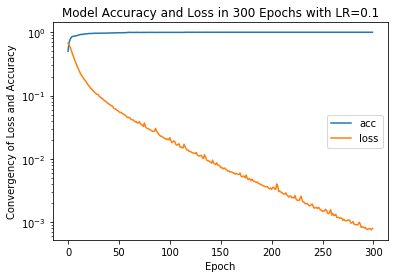

In [28]:
#Plot figure
plt.semilogy(history.history['acc'])
plt.semilogy(history.history['loss'])
plt.title('Model Accuracy and Loss in 300 Epochs with LR=0.1')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
#plt.text(Plot of Model Accuracy and Loss. Loss is decreasing and accuracy is increasing.', ha='center', va='top')
plt.show()